# Problem set 6

- Below are the functions necessary to complete problem set 6
- We will use an internal data set that is available in r-studio

## A.1 Import receipts data

In [48]:
#Imports internal data set
df = read.csv('pakistan.csv')
head(df,2)

totexp,food,hhincomepc
3860.917,2147.583,17800.000
2341.984,1464.000,7055.027


## A.2 Import packages

In [49]:
library(dplyr) #Data manipulation

# 1. Regression

- `PS6 corresponding problem: 1.a`


## 1.1 Create new variable: percent of total household expenditure on food on household income per capita

In [56]:
#Method 1 DPLYR
df = df %>% mutate(
    perfood = food/totexp)

#Method 2 Non-DPLYR
df$perfood = df$food/df$totexp

df %>% head(3)

totexp,food,hhincomepc,perfood
3860.917,2147.583,17800.000,0.5562366
2341.984,1464.000,7055.027,0.6251111
8097.083,3015.167,4585.714,0.3723769


## 1.1 Basic regression

In [61]:
data(mtcars)

In [62]:
lm(wt~mpg , data= mtcars)


Call:
lm(formula = wt ~ mpg, data = mtcars)

Coefficients:
(Intercept)          mpg  
     6.0473      -0.1409  


## 1.2 Summary of regression

### 1.2.1 Save regression output

In [63]:
reg_output = lm(mpg~wt , data= mtcars)

### 1.2.2 Summary

In [64]:
summary(reg_output)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


### 1.2.3 Confidence interval

In [65]:
confint(reg_output)

,2.5 %,97.5 %
(Intercept),33.450500,41.119753
wt,-6.486308,-4.202635


## 1.3 Plot
- `PS6 corresponding problem: 1.b`


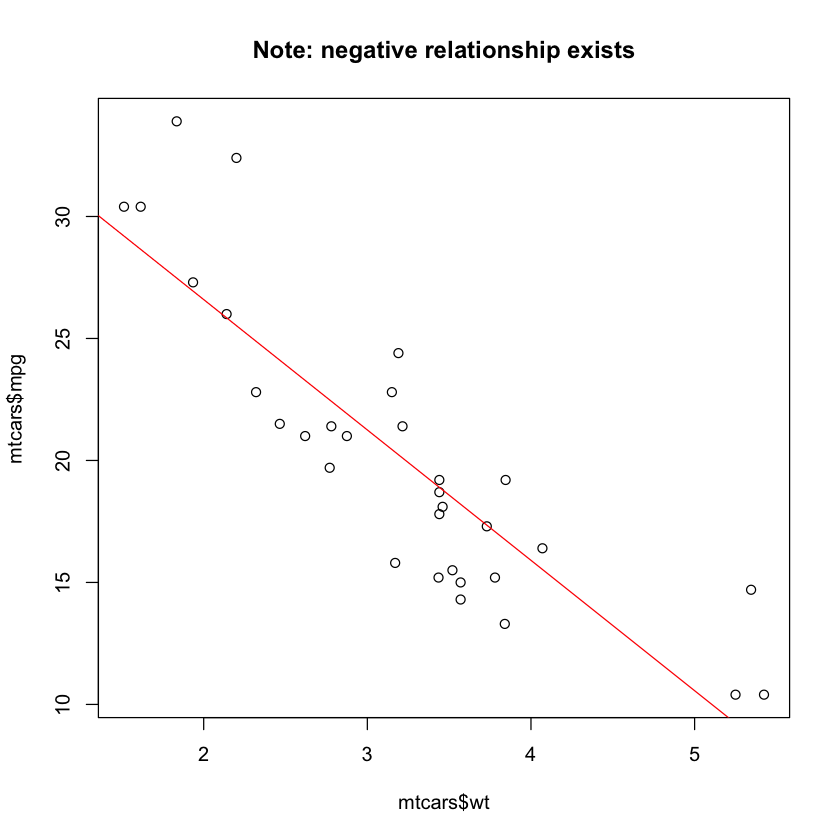

In [66]:
#Scatter
plot(mtcars$wt,mtcars$mpg, main='Note: negative relationship exists')

#linear regression line
abline(reg_output, col="red")

# 3. Residuals

- `PS6 corresponding problem: 1.e`


## 3.1 Extract from regression output

In [67]:
reg_output = lm(mpg~wt , data= mtcars)

In [68]:
reg_output$residuals[c(1:3)] #Remove [c(1,4)] to show all residuals

Mazda RX4 Mazda RX4 Wag    Datsun 710 
   -2.2826106    -0.9197704    -2.0859521

## 3.2 Plot residuals

In [69]:
residuals = reg_output$residuals

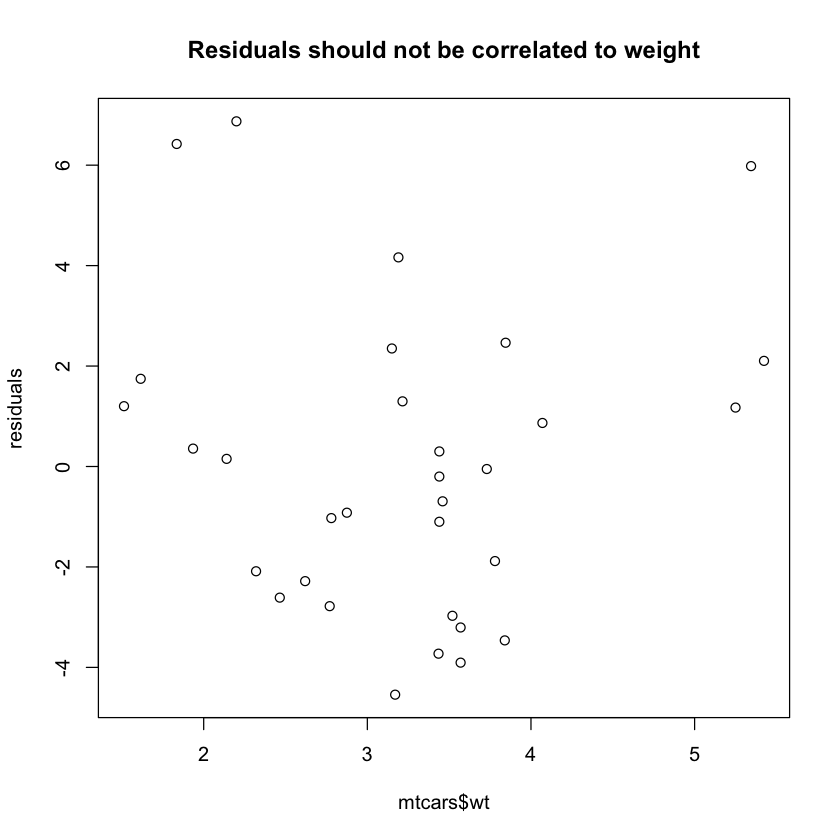

In [70]:
plot(x=mtcars$wt, y=residuals, main='Residuals should not be correlated to weight')

## 3.3 Residuals vs regression

### 3.1.1 Create log of income

In [84]:
# Method 1: DPLYR
df = df  %>% mutate(
    hhincomepc_log = log(hhincomepc)
)
df %>% head(2)

totexp,food,hhincomepc,perfood,hhincomepc_log
3860.917,2147.583,17800.000,0.5562366,9.786954
2341.984,1464.000,7055.027,0.6251111,8.861496


### 3.1.2 Graph

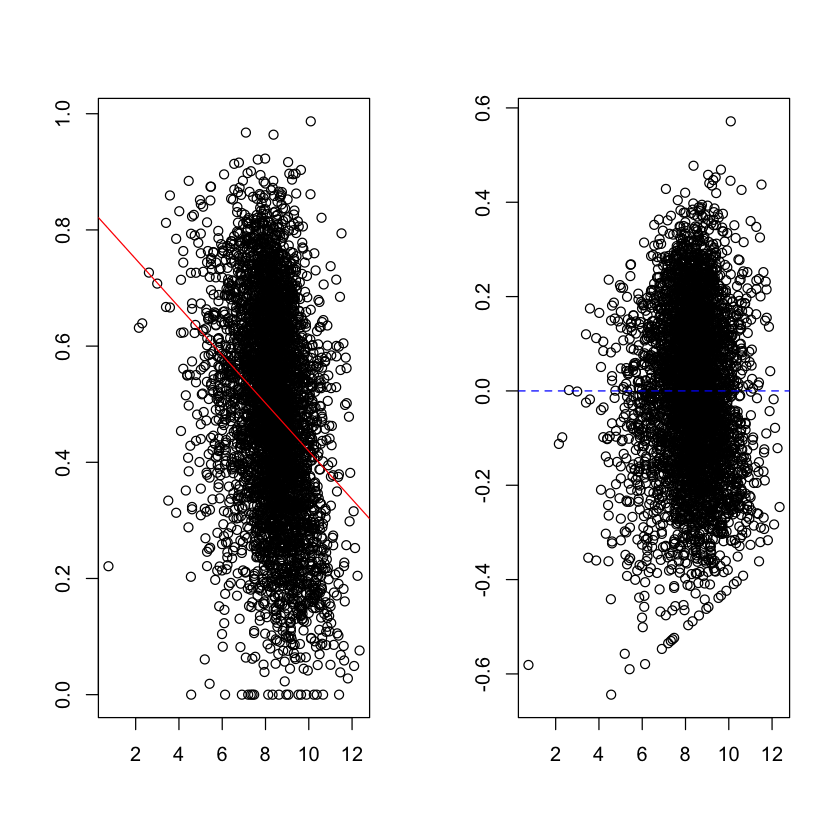

In [90]:
# 1 Create side by side plots
par(mfrow=c(1,2))


#2. Plot 1

## 2.1 Regression
reg_log = lm(perfood~hhincomepc_log, data=df) 

## 2.2 Plot
plot(x=df$hhincomepc_log, 
     y= df$perfood, 
     xlab="", 
     ylab="",
     main="")

## 2.3 Add line
abline(reg_3, col='red')


#3. Plot 2
## 3.1 Extract residuals
reg_log_resids = reg_log$residuals

plot(x=df$hhincomepc_log, 
     y= reg_log_resids, 
     xlab="", 
     ylab="",
     main="")

abline(h=0, lty=2,col="blue")

# 4. More regressions
- `PS6 corresponding problem: 2`


In [92]:
df_quart = read.csv('quartet.csv')
df_quart %>% head(2)

x1,y1,x2,y2,x3,y3,x4,y4
10,8.04,10,9.14,10,7.46,8,6.58
8,6.95,8,8.14,8,6.77,8,5.76


## 4.1 Regressions

- `PS6 corresponding problem: 2.a`


### 4.1.1 Regressions

In [111]:
reg1 = summary(lm(y1~x1, data = df_quart))
reg2 = summary(lm(y2~x2, data = df_quart))
reg3 = summary(lm(y3~x3, data = df_quart))
reg4 = summary(lm(y4~x4, data = df_quart))

### 4.1.2 Extract coefficients and r2

#### 4.1.2.1 Summary

In [123]:
reg1


Call:
lm(formula = y1 ~ x1, data = df_quart)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92127 -0.45577 -0.04136  0.70941  1.83882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0001     1.1247   2.667  0.02573 * 
x1            0.5001     0.1179   4.241  0.00217 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6665,	Adjusted R-squared:  0.6295 
F-statistic: 17.99 on 1 and 9 DF,  p-value: 0.00217


#### 4.1.2.2 Only coeffs

In [121]:
reg1$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.0000909,1.1247468,2.667348,0.025734053
x1,0.5000909,0.1179055,4.241455,0.002169629


In [149]:
reg1$coefficients[,'Estimate']

(Intercept)          x1 
  3.0000909   0.5000909

#### 4.1.2.3 Only r-squared

In [113]:
reg2$r.squared

[1] 0.666242

## 4.2 Graph 4 plots
- `PS6 corresponding problem: 2.b`


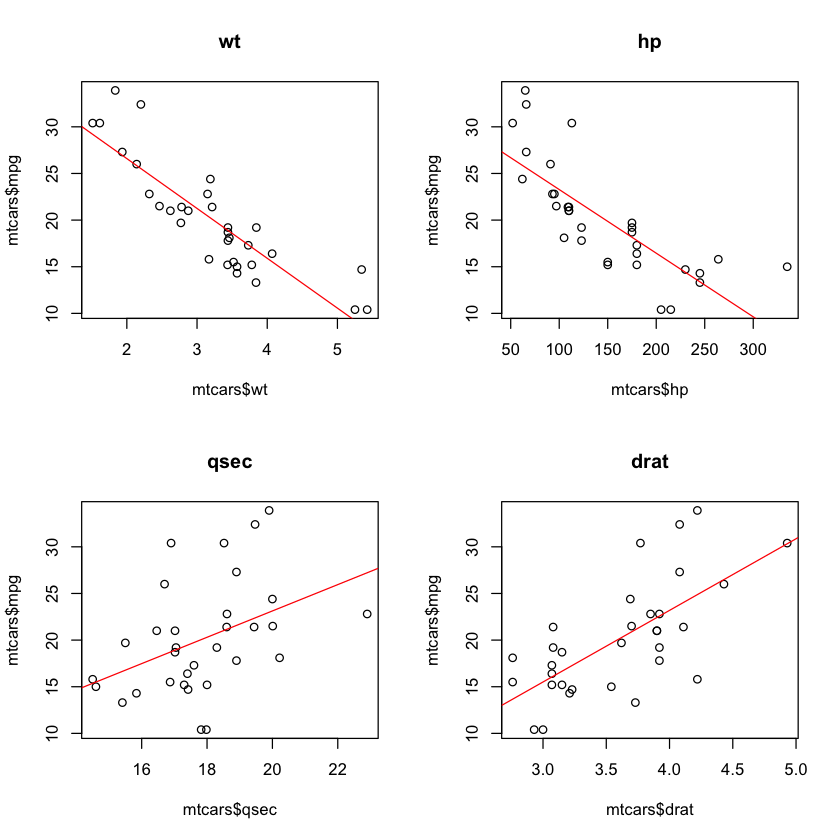

In [11]:
par(mfrow=c(2,2))
plot(mtcars$wt, mtcars$mpg, main='wt')
abline(lm(mpg~wt, data= mtcars), col="red")

plot(mtcars$hp, mtcars$mpg, main='hp')
abline(lm(mpg~hp, data= mtcars), col="red")

plot(mtcars$qsec, mtcars$mpg, main='qsec')
abline(lm(mpg~qsec, data= mtcars), col="red")

plot(mtcars$drat, mtcars$mpg, main='drat')
abline(lm(mpg~drat, data= mtcars), col="red")

# 5. Multiple regressions
- `PS6 corresponding problem: 3.c`


- Simply add a plus after each regressor

## 5.1 Download data

In [151]:
df_safrica = read.csv('safrica.csv')
df_safrica %>% head(2)

wage,age,educ,exper,union,female,married,urban
13.706250,26,13,6,0,0,1,1
6.985119,31,8,16,0,0,1,1


## 5.2 Run regression

In [155]:
reg_multiple = lm(wage~union+educ, data= df_safrica)
summary(reg_multiple)


Call:
lm(formula = wage ~ union + educ, data = df_safrica)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.878  -3.332  -1.088   1.356 208.819 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.64024    0.10468   15.67   <2e-16 ***
union        1.25083    0.11454   10.92   <2e-16 ***
educ         0.73407    0.01447   50.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.219 on 19945 degrees of freedom
Multiple R-squared:  0.1336,	Adjusted R-squared:  0.1335 
F-statistic:  1538 on 2 and 19945 DF,  p-value: < 2.2e-16
